In [148]:
import pandas as pd
tr_df = pd.read_pickle("/store/aug/train.pkl")
tr_df['Score'].describe()

count    13731.000000
mean         2.024839
std          0.923629
min         -1.000000
25%          1.378398
50%          2.034227
75%          2.659013
max          4.673205
Name: Score, dtype: float64

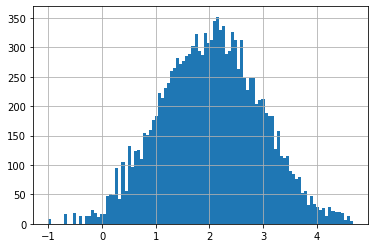

In [149]:
tr_df['Score'].hist(bins=100)

In [159]:
df = pd.read_csv("http://192.168.10.7/aug/pre_submit.csv", names=['id', 'Score'])
df.describe()

,id,Score
count,13731.000000,13731.000000
mean,13715.888428,1.760324
std,7891.540358,0.384606
min,5.000000,0.089338
25%,6908.500000,1.490558
50%,13686.000000,1.817776
75%,20528.000000,2.062548
max,27463.000000,3.080263


-2.6383263290275876

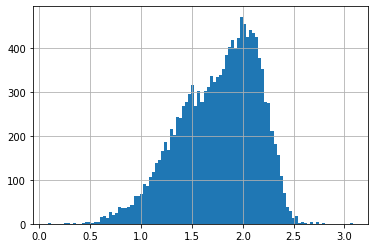

In [160]:
from aplf.takeda.eval import r2
df['Score'].hist(bins=100)
r2(df["Score"], tr_df['Score'])

In [163]:
df = pd.read_csv("http://192.168.10.8/aug/pre_submit.csv", names=['id', 'Score'])
df['Score'].describe()

count    13731.000000
mean         1.057543
std          0.543278
min         -1.000000
25%          0.778198
50%          1.167997
75%          1.432385
max          2.323287
Name: Score, dtype: float64

-2.575684235225923

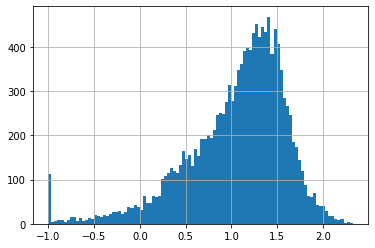

In [164]:
df['Score'].hist(bins=100)
r2(df["Score"], tr_df['Score'])

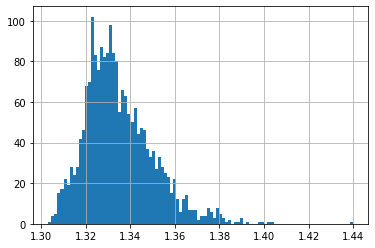

In [9]:
df['Score'].sample(2048).hist(bins=100)

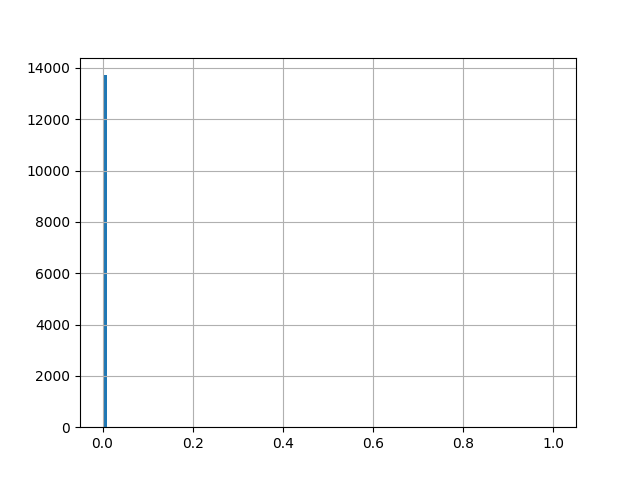

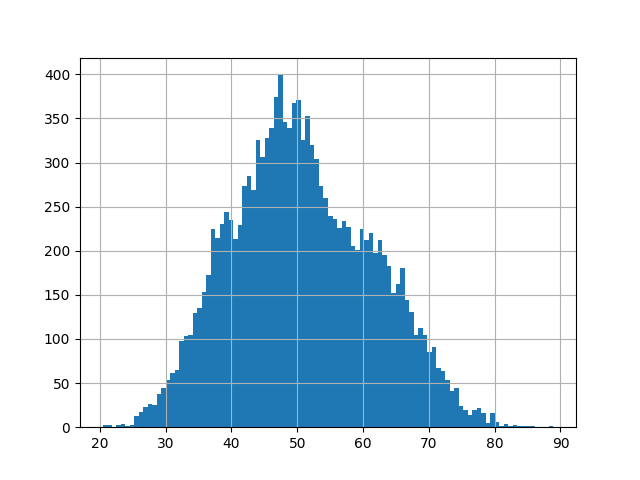

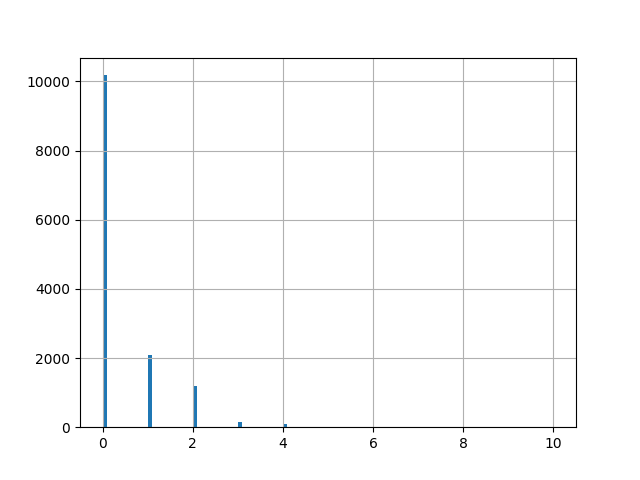

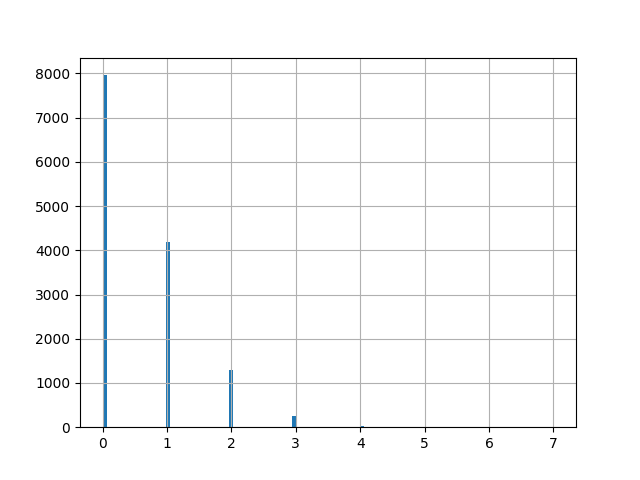

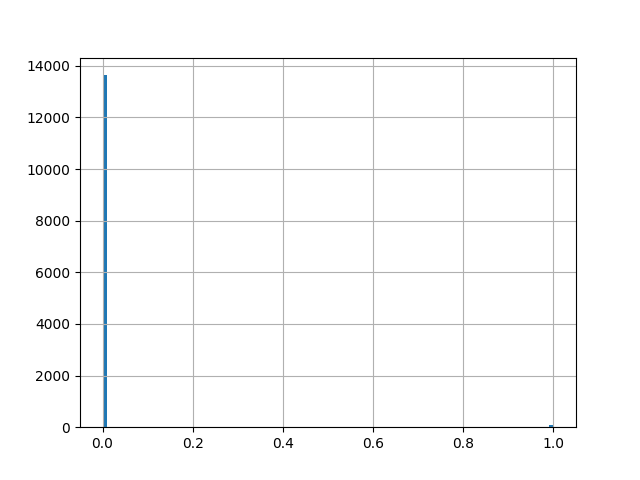

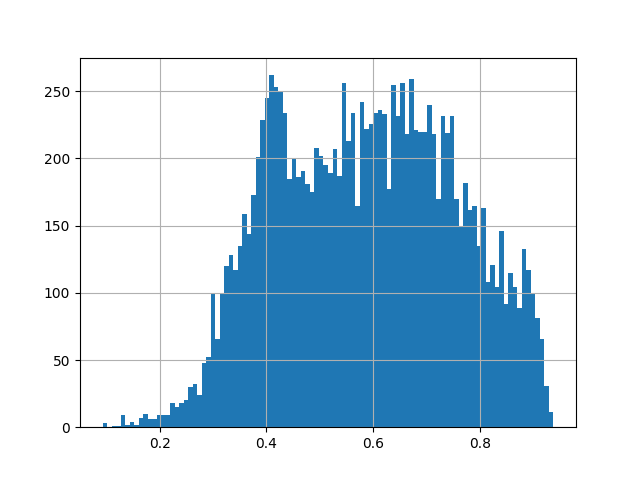

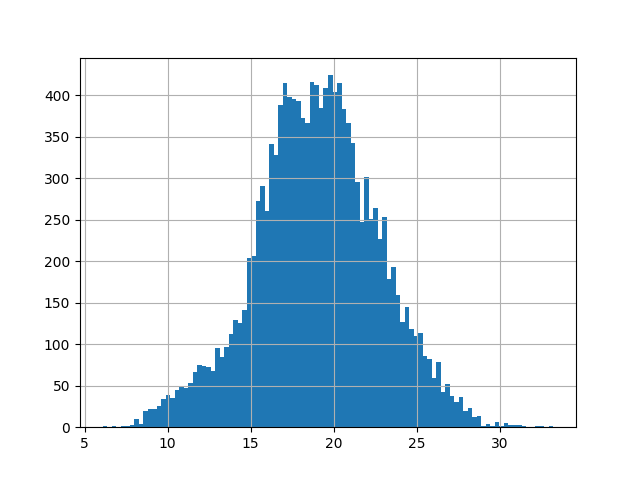

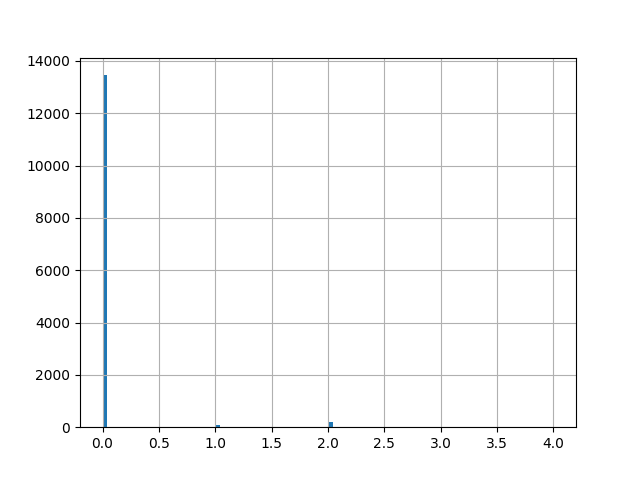

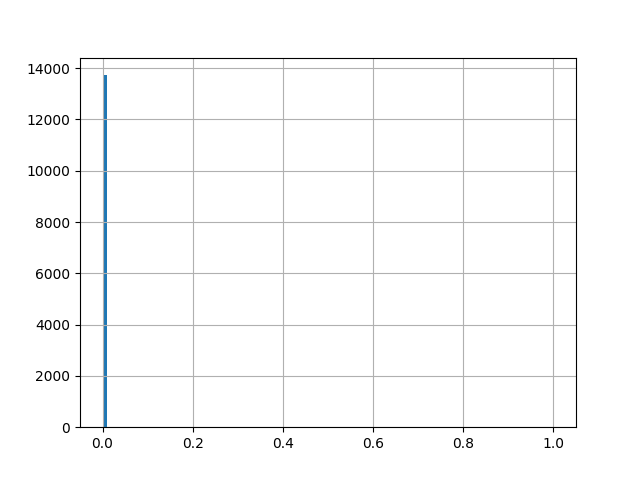

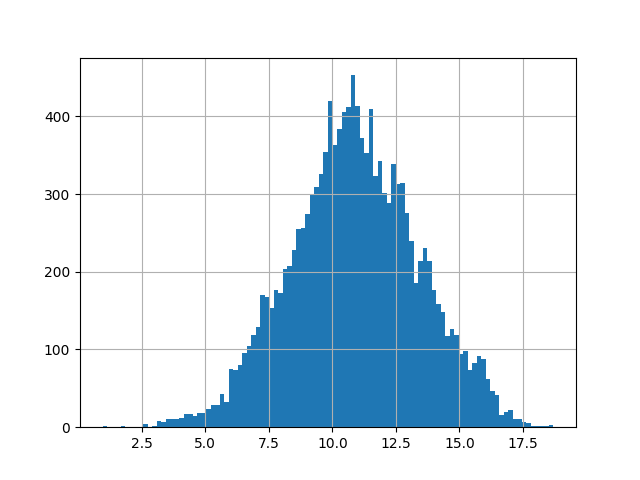

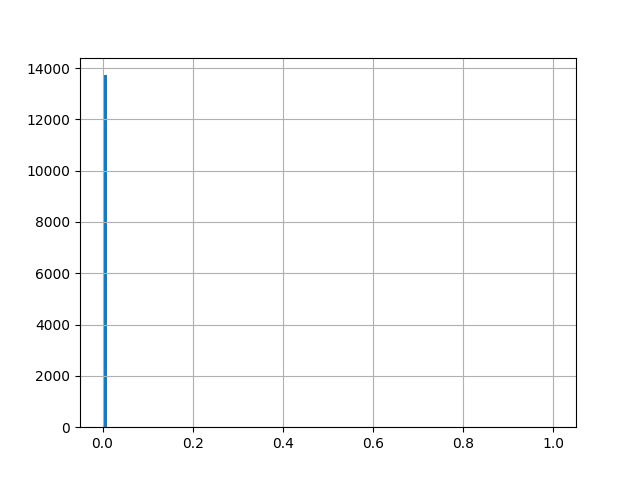

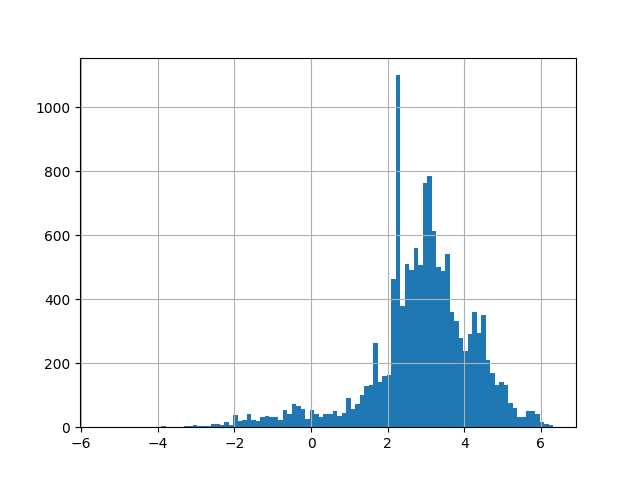

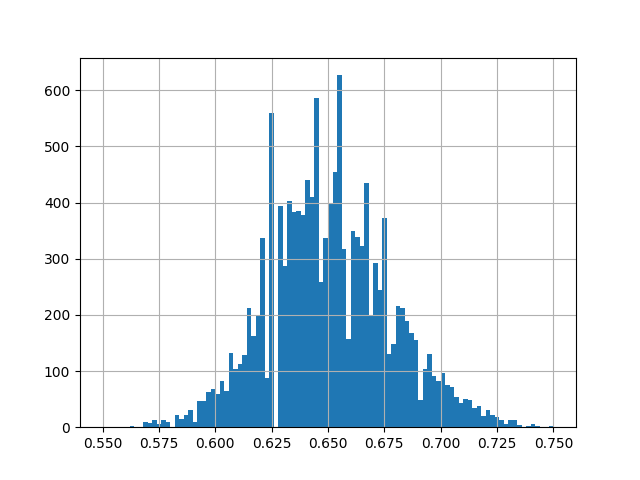

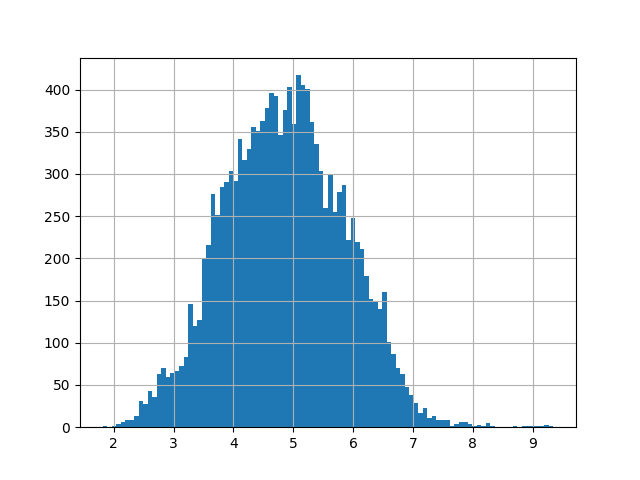

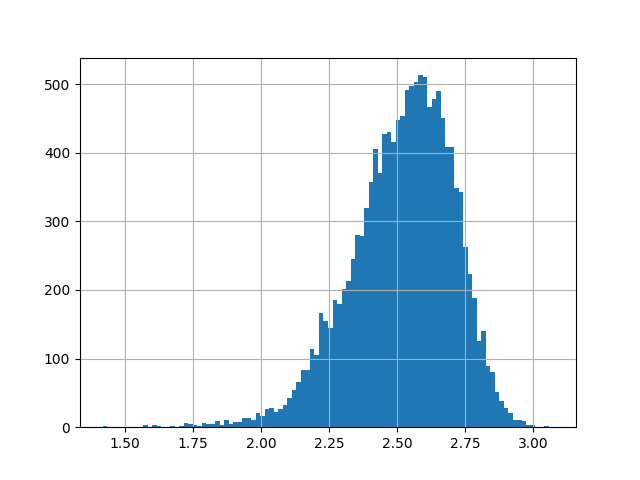

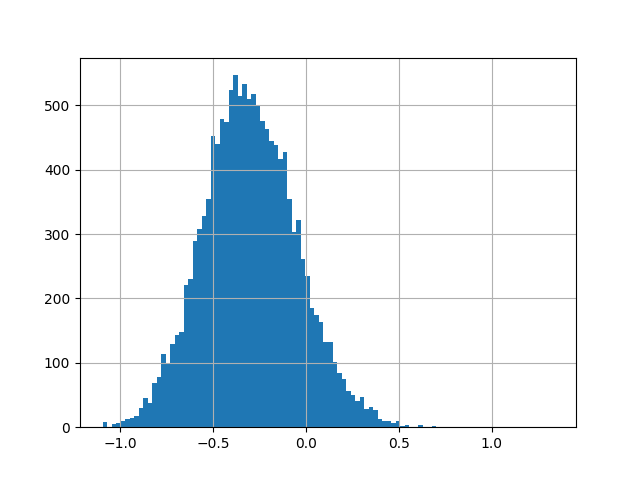

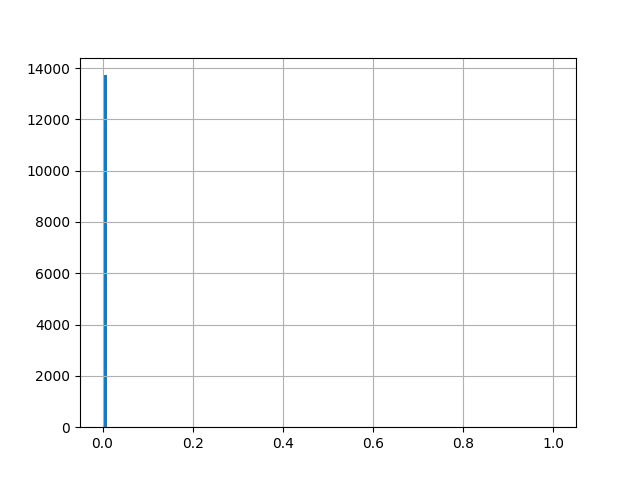

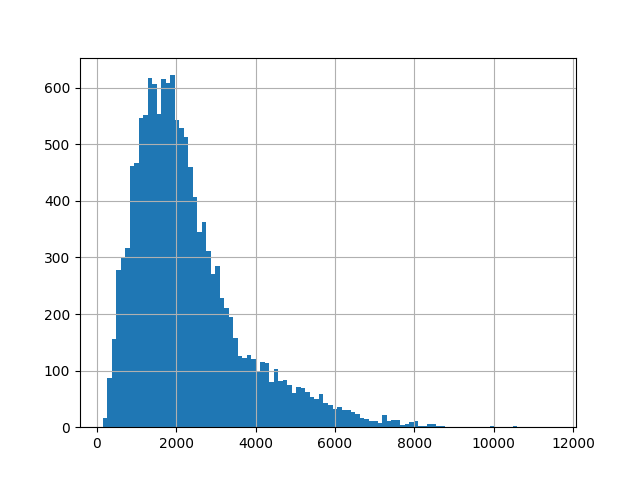

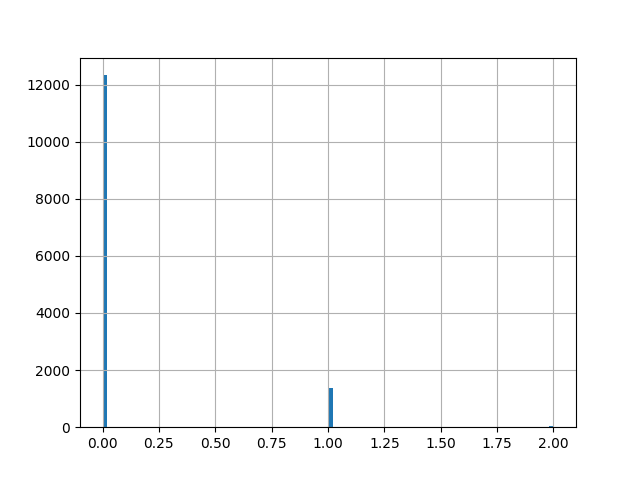

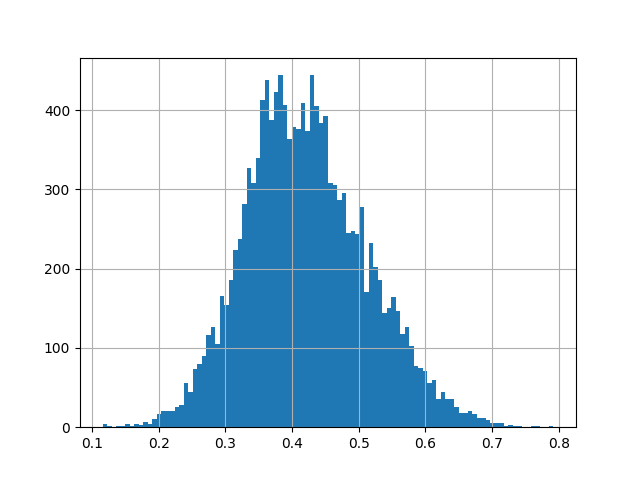

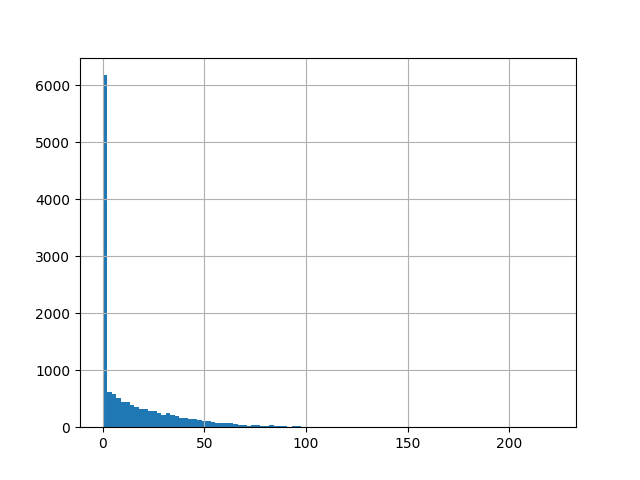

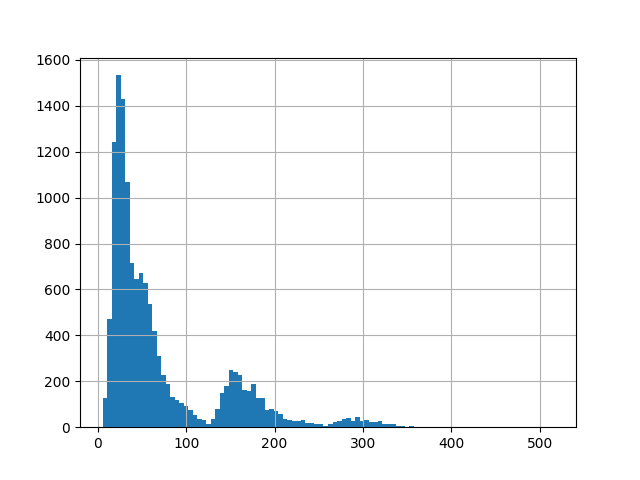

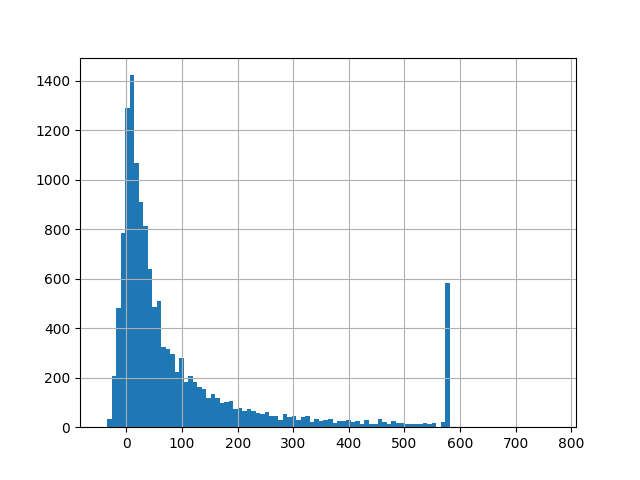

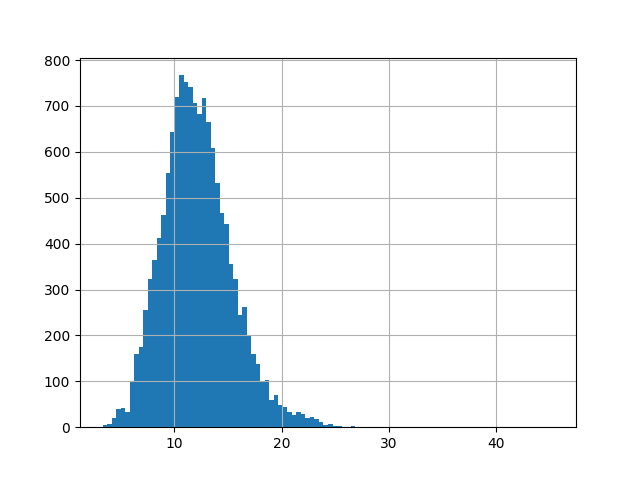

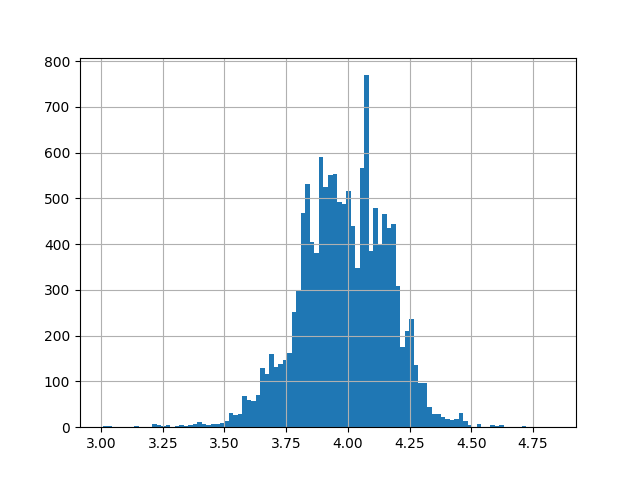

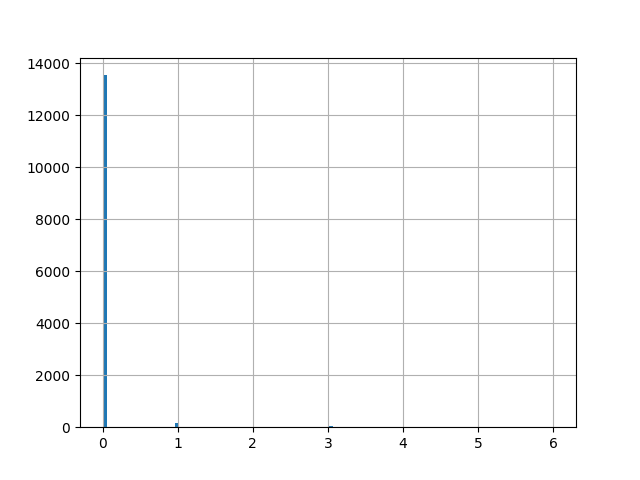

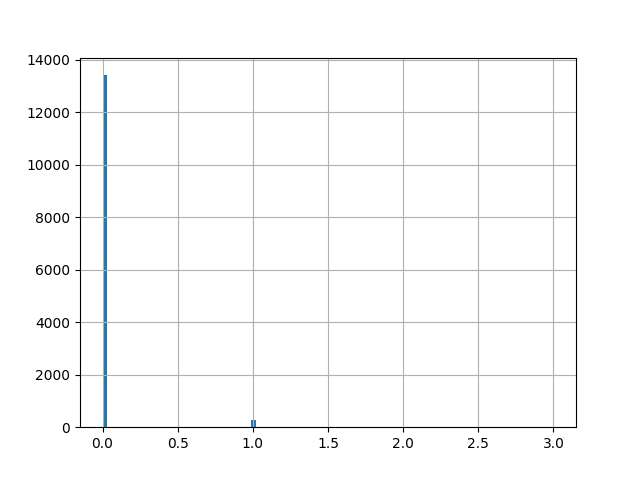

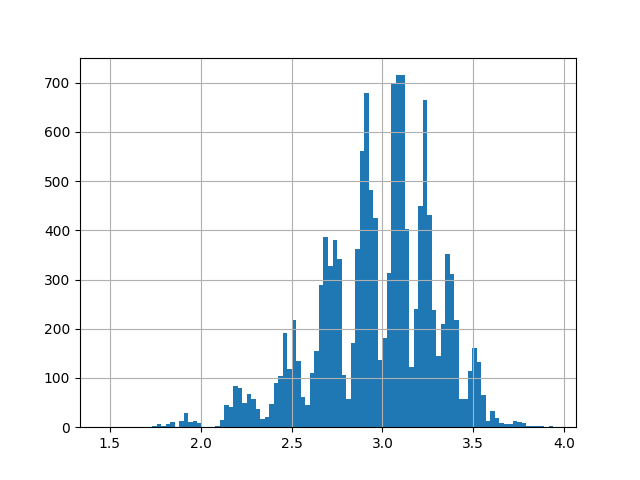

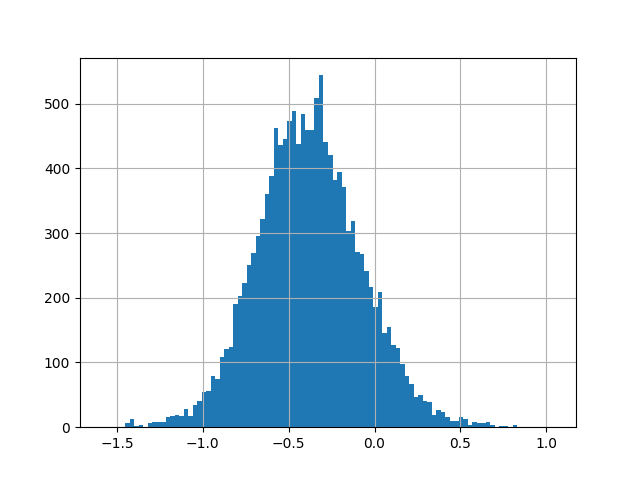

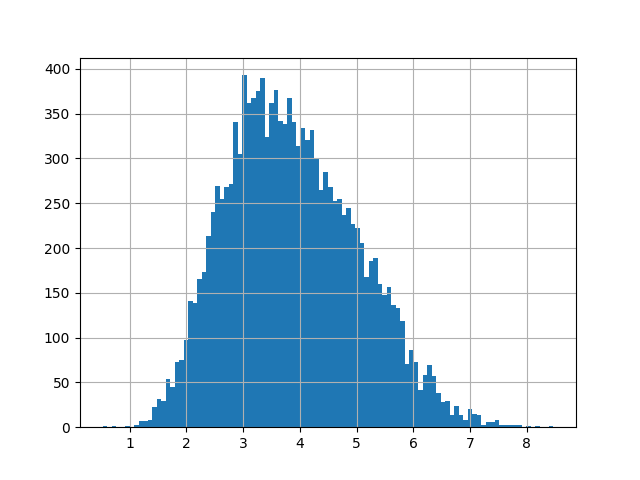

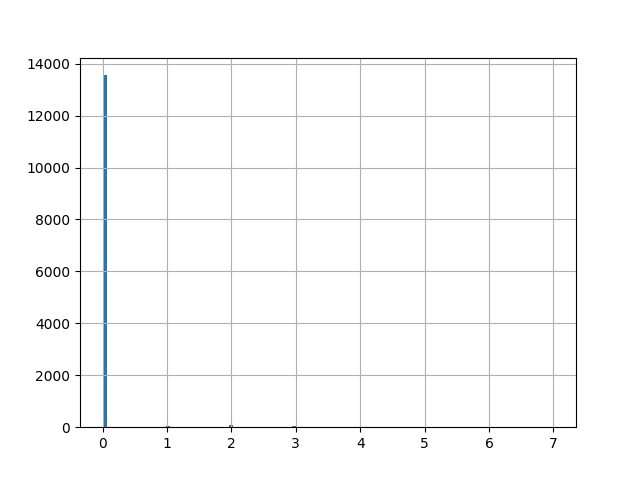

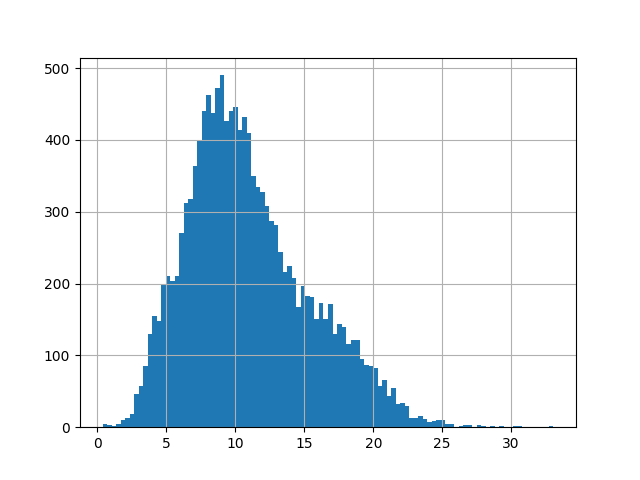

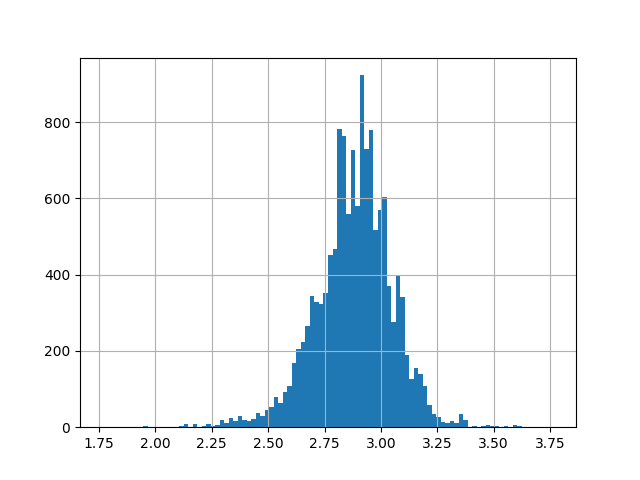

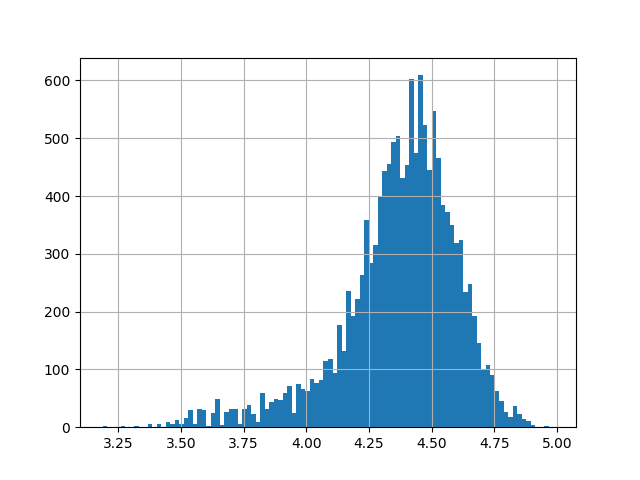

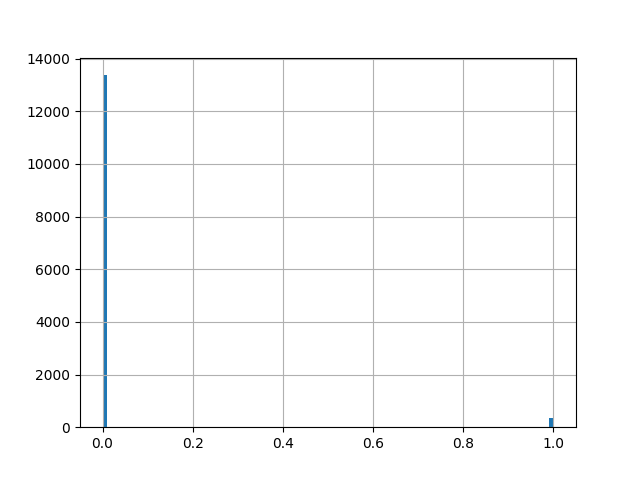

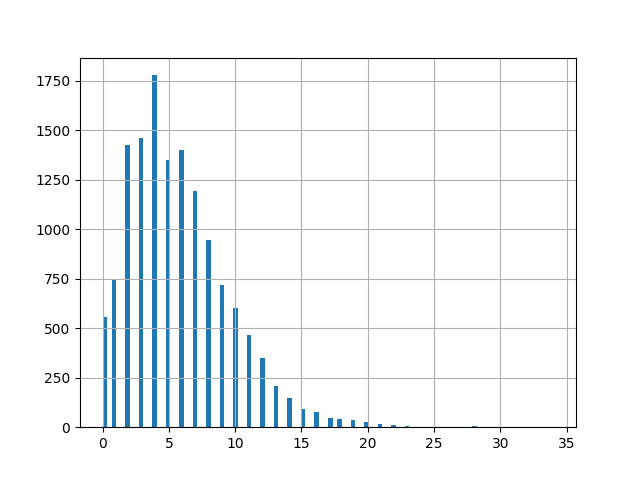

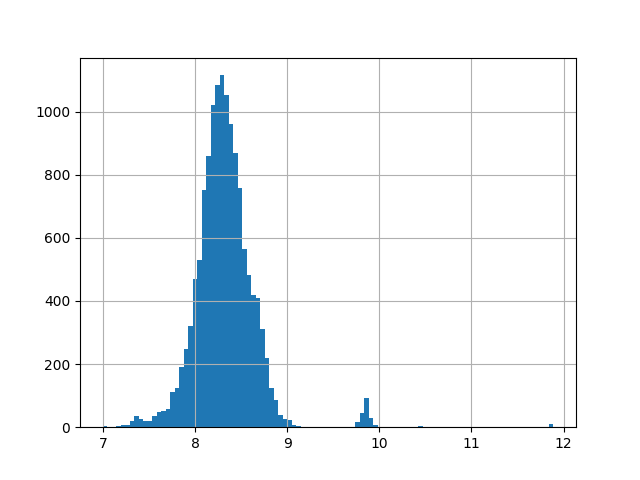

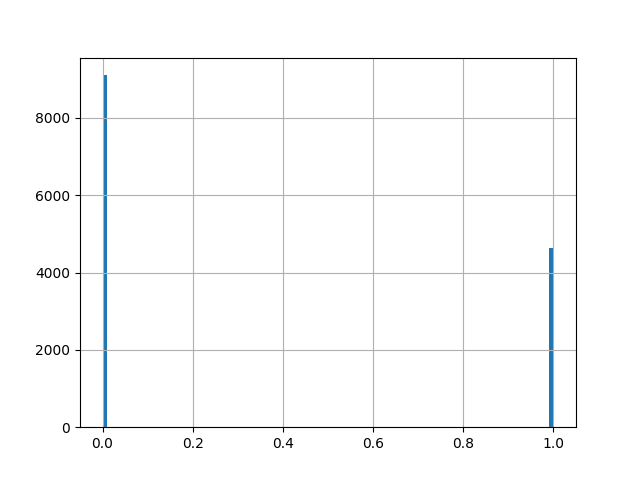

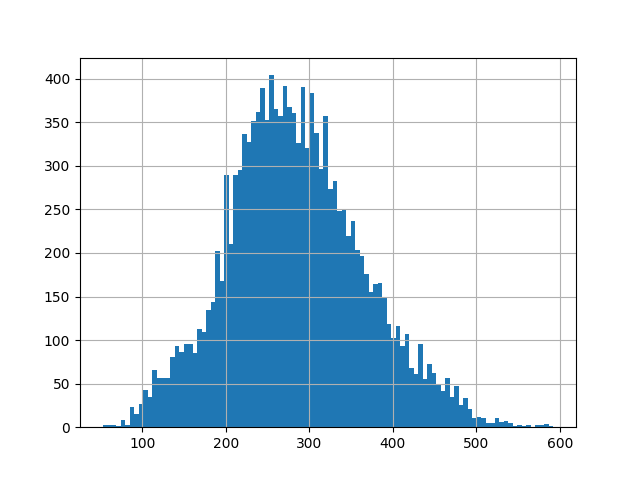

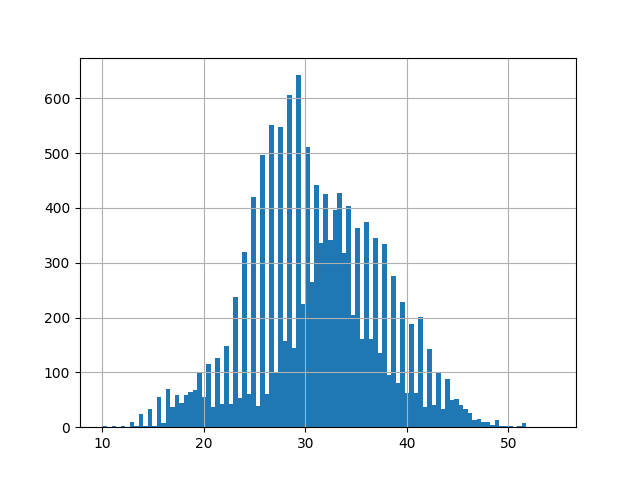

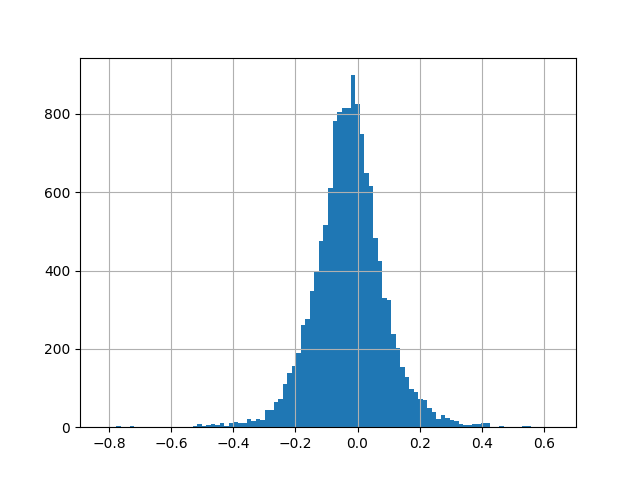

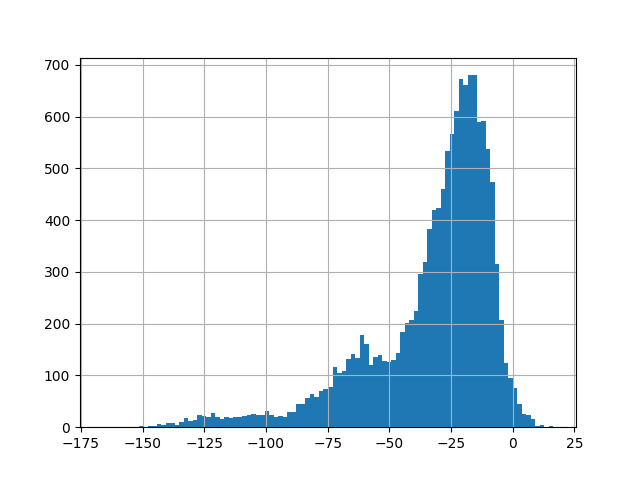

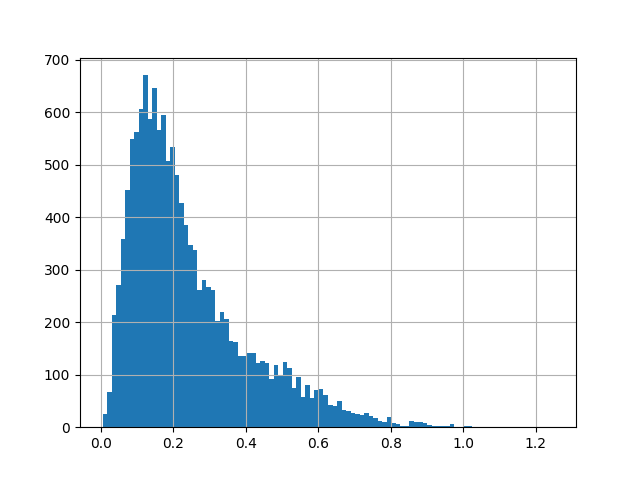

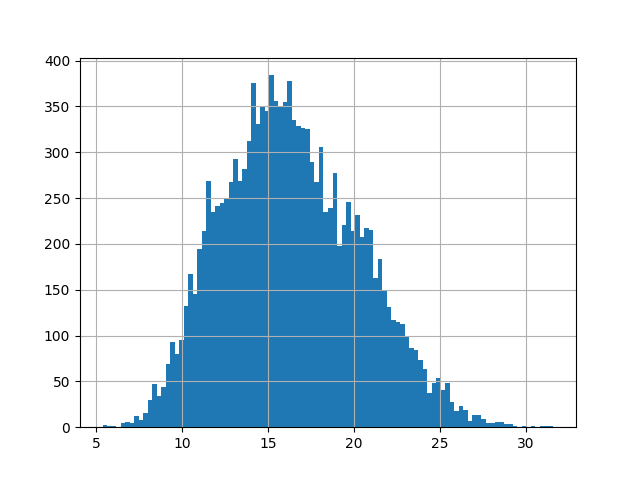

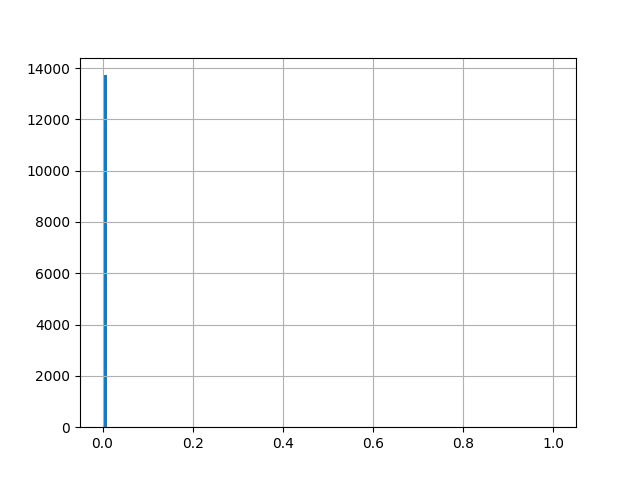

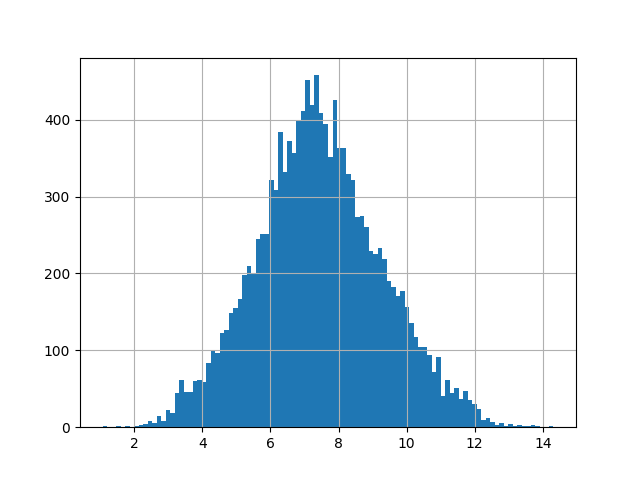

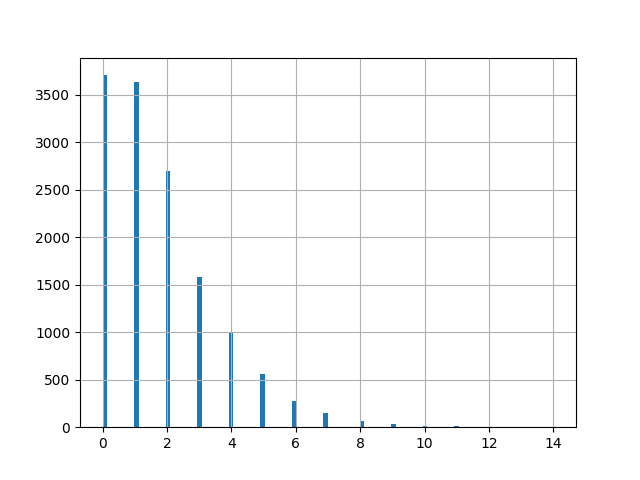

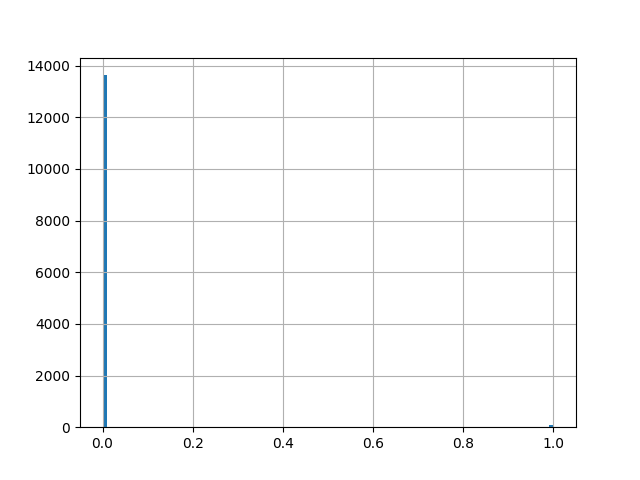

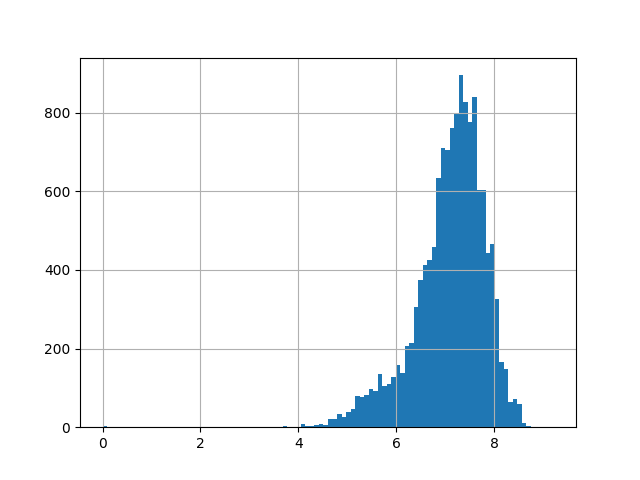

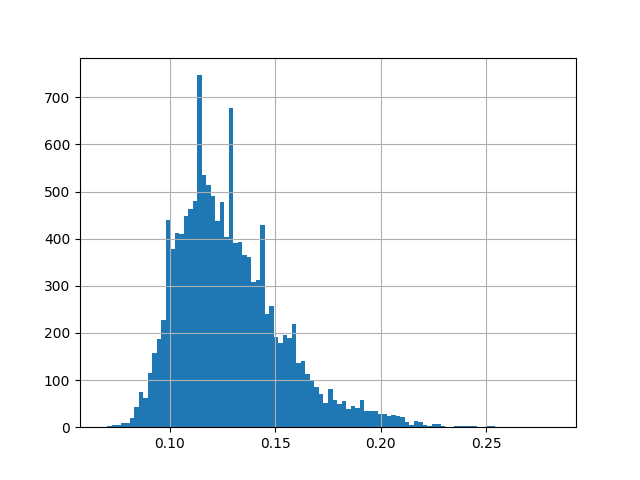

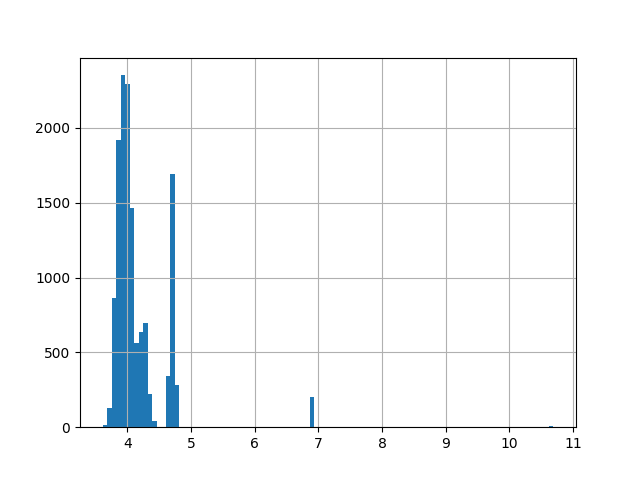

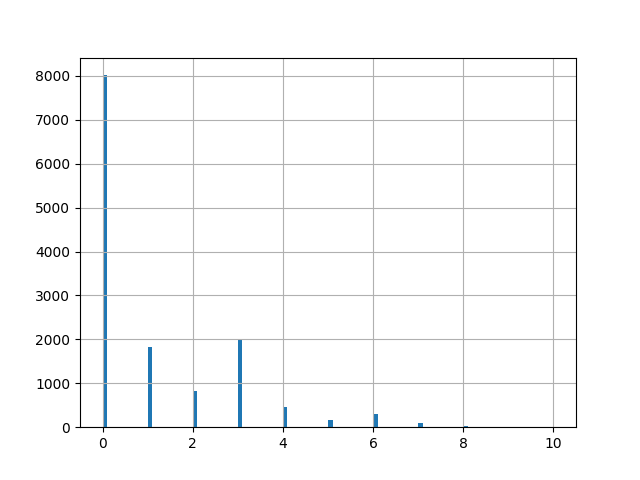

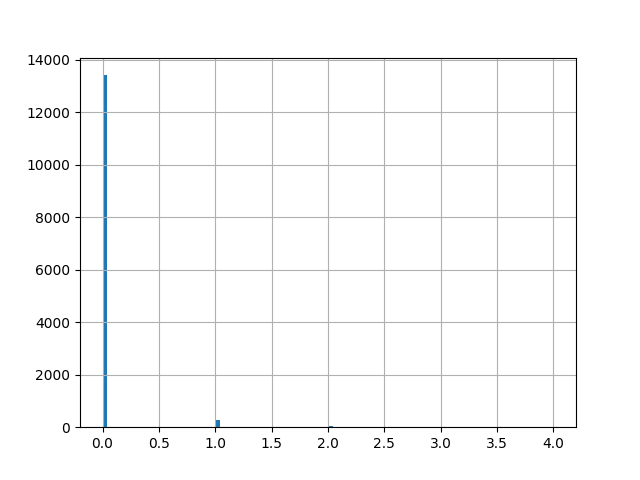

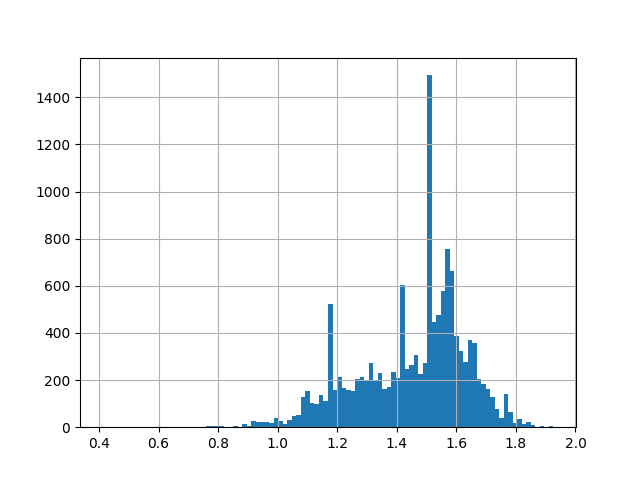

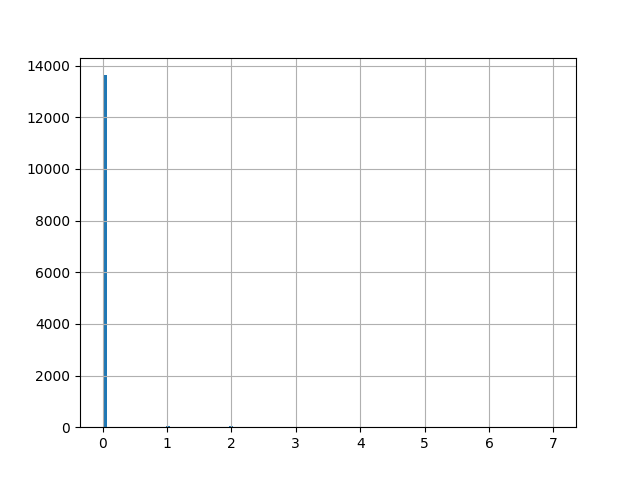

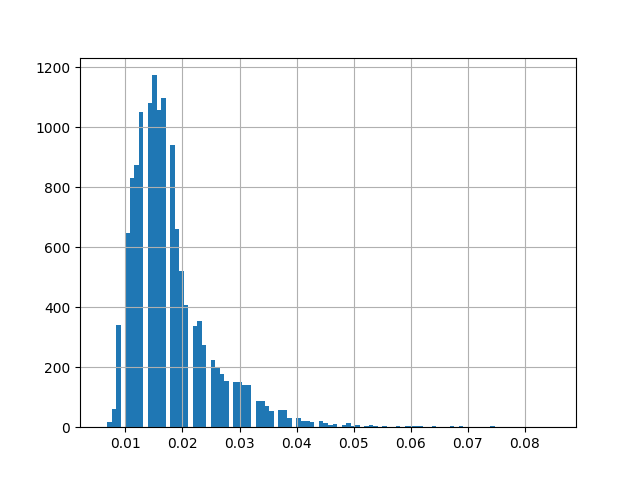

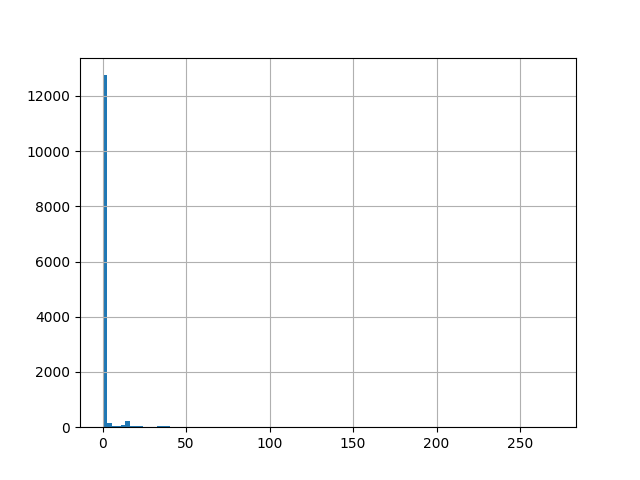

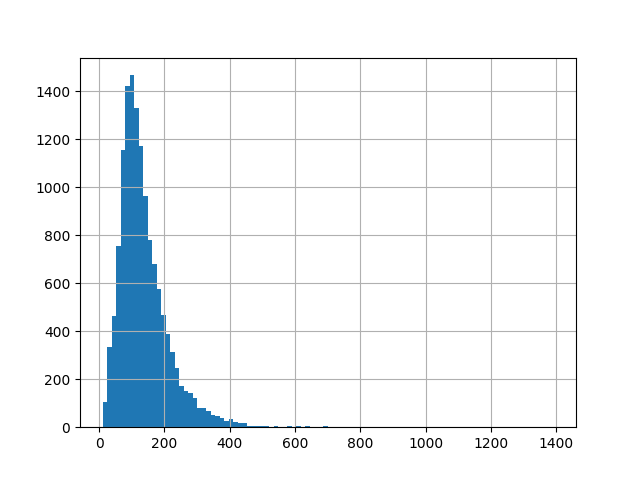

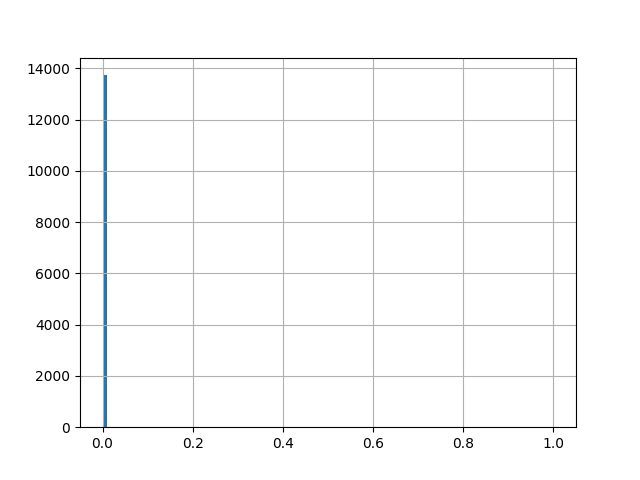

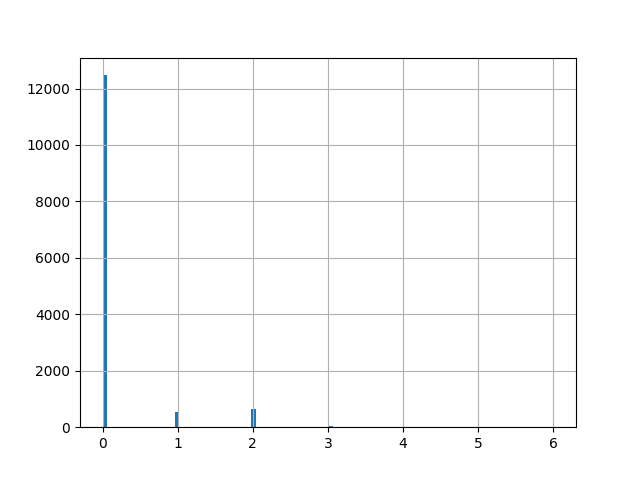

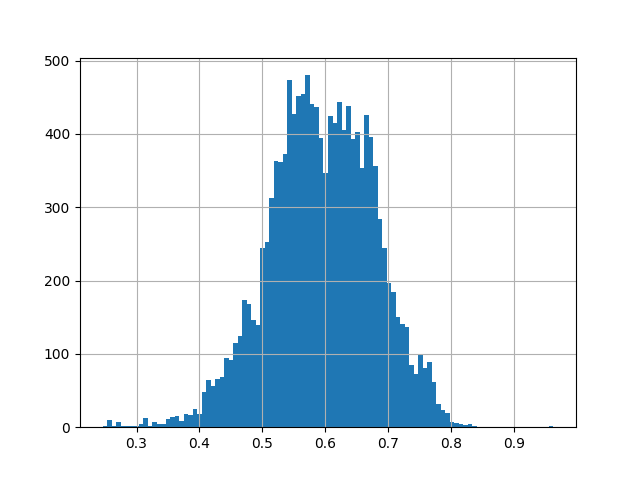

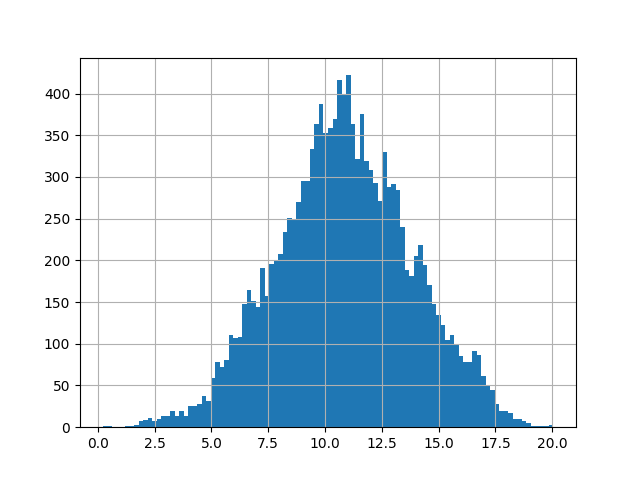

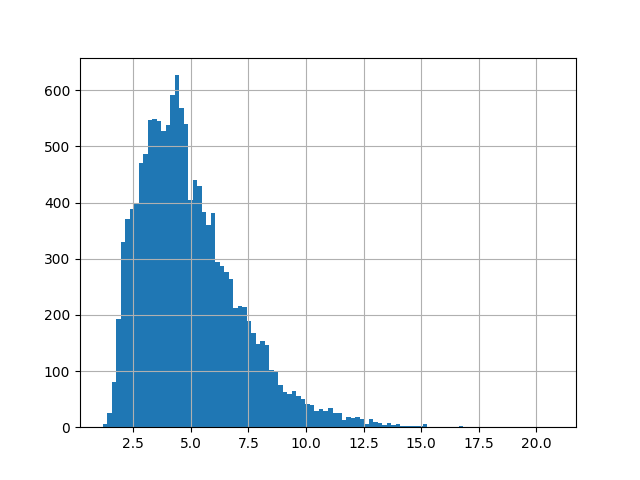

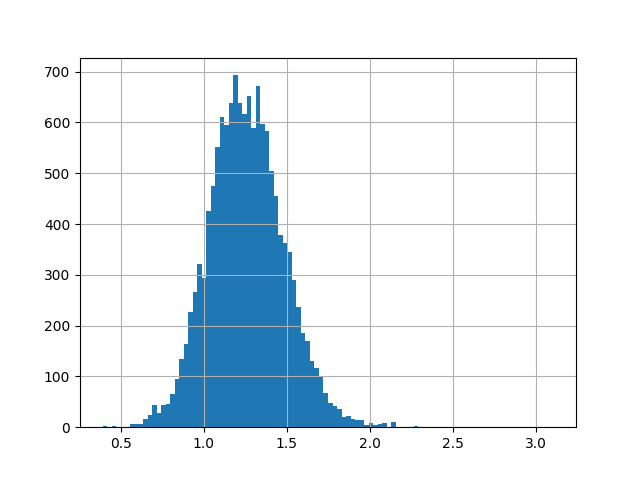

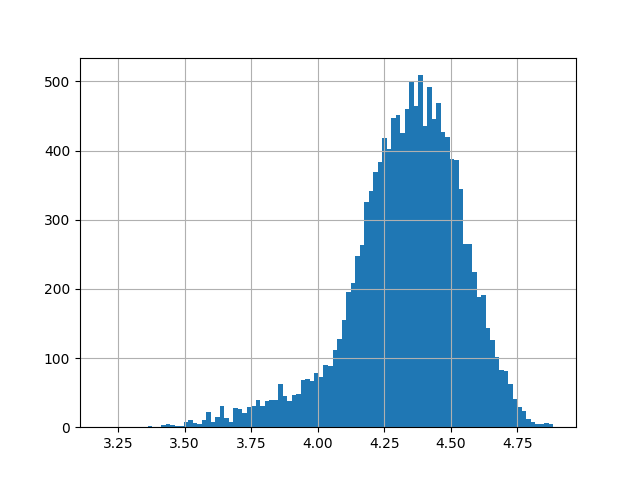

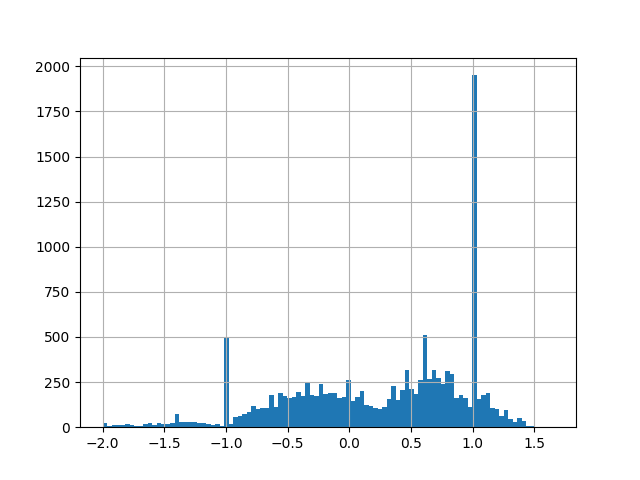

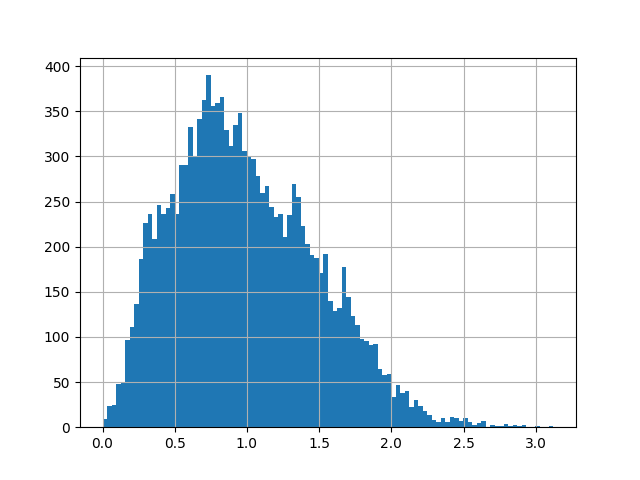

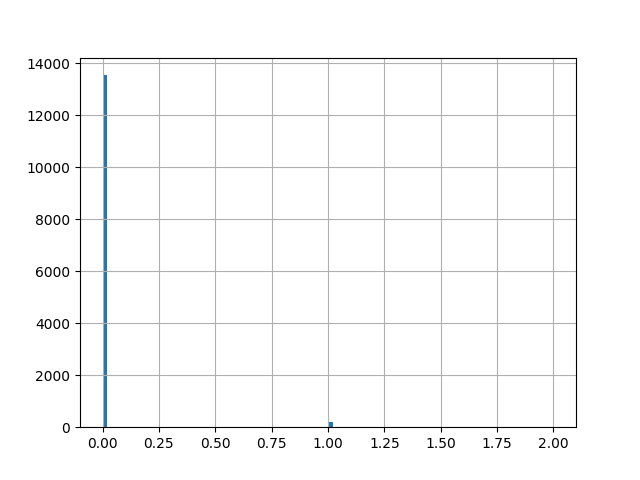

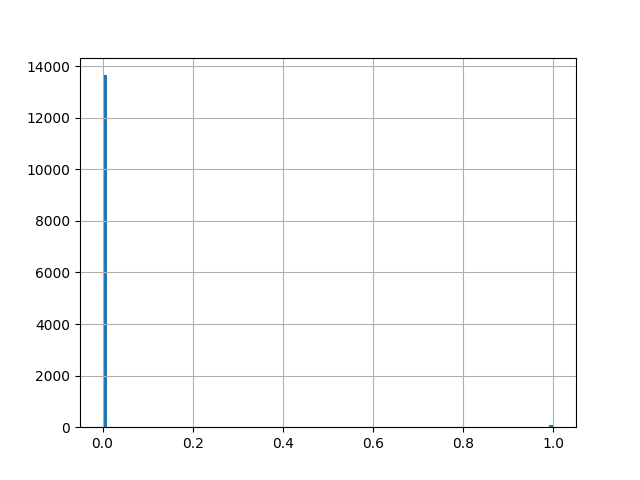

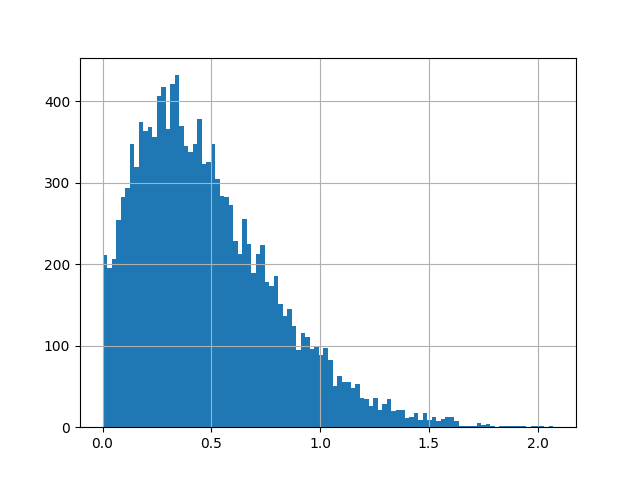

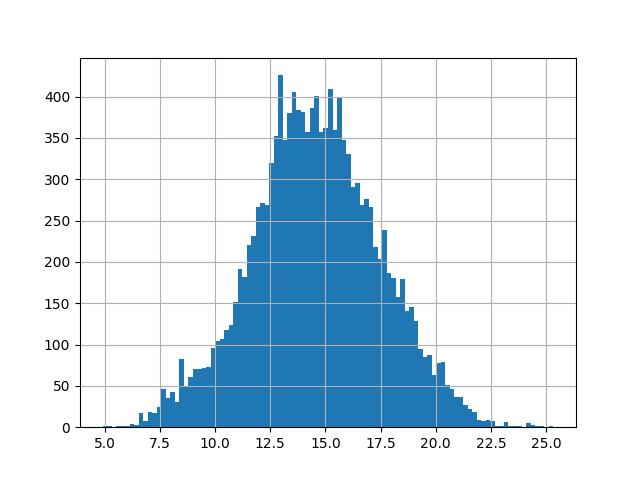

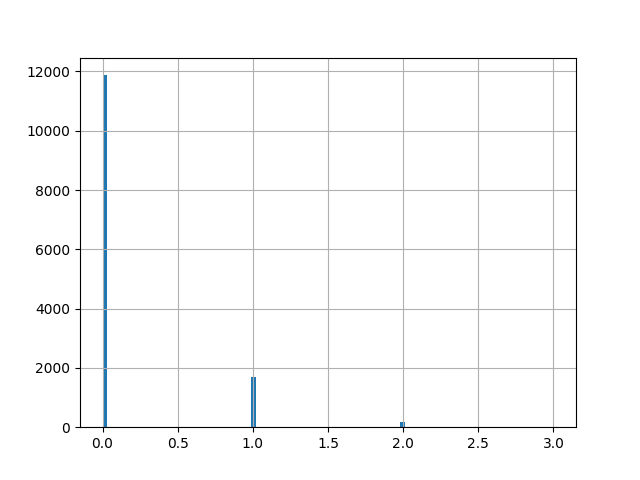

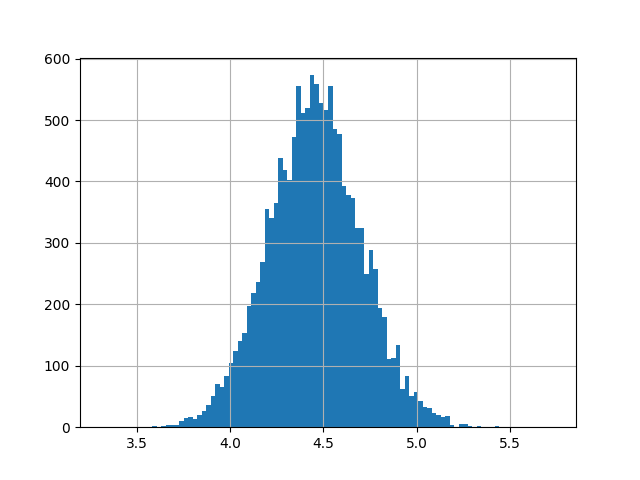

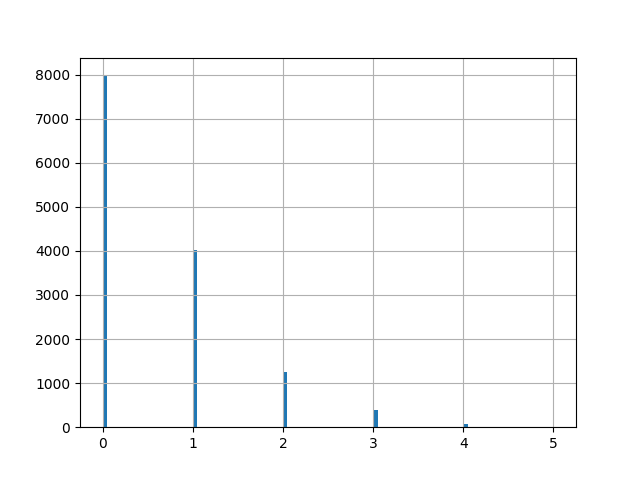

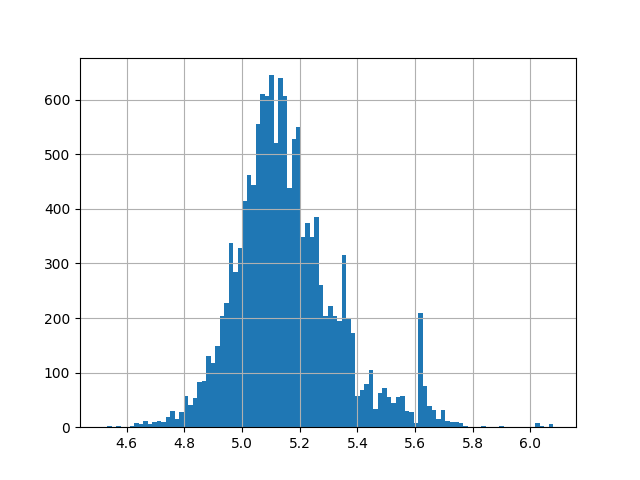

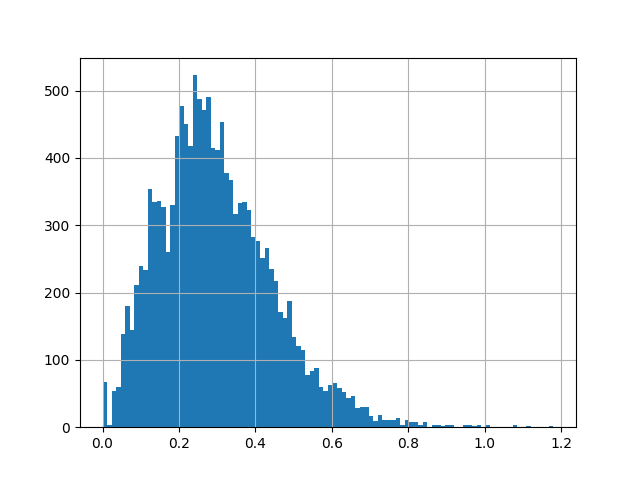

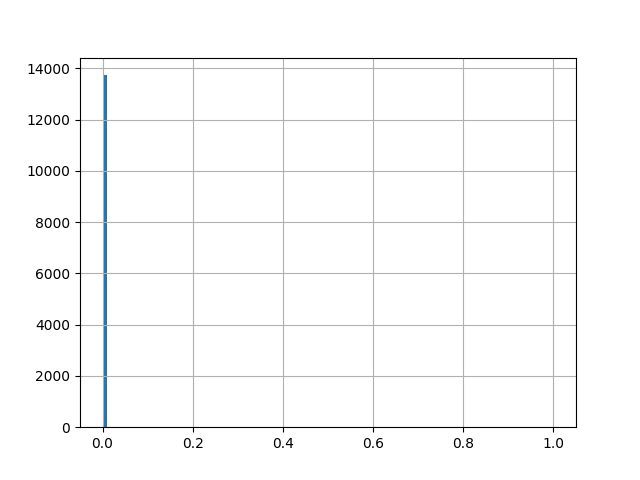

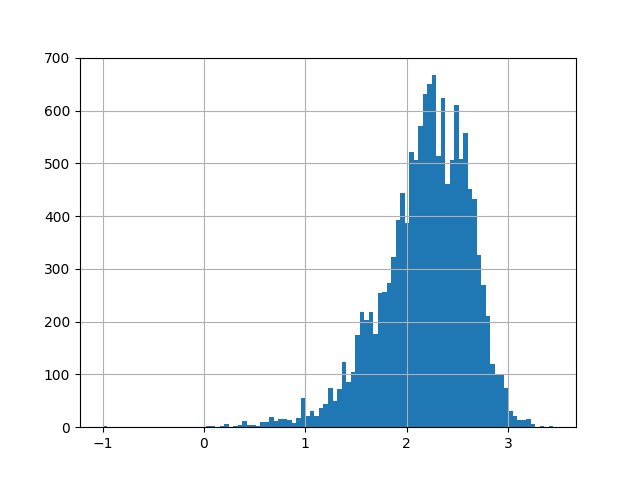

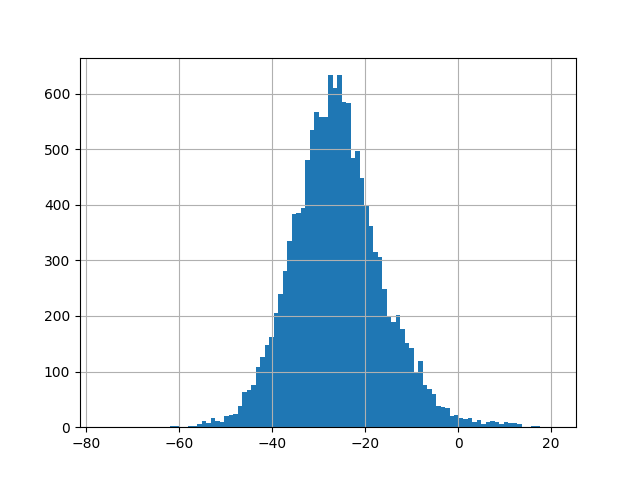

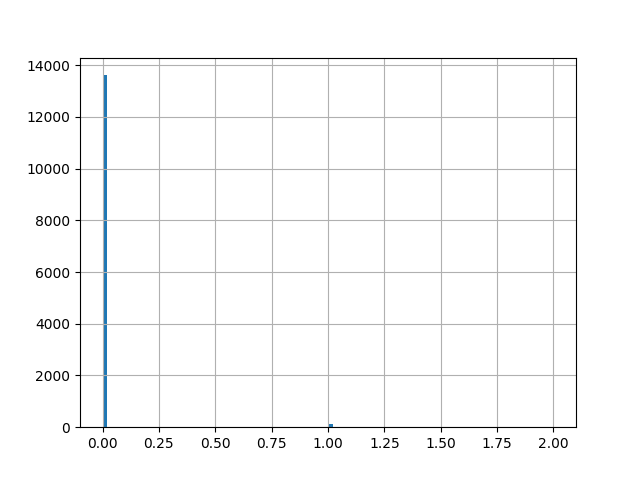

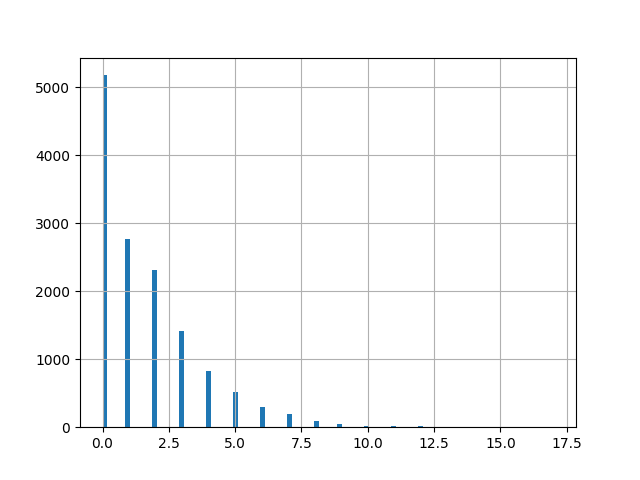

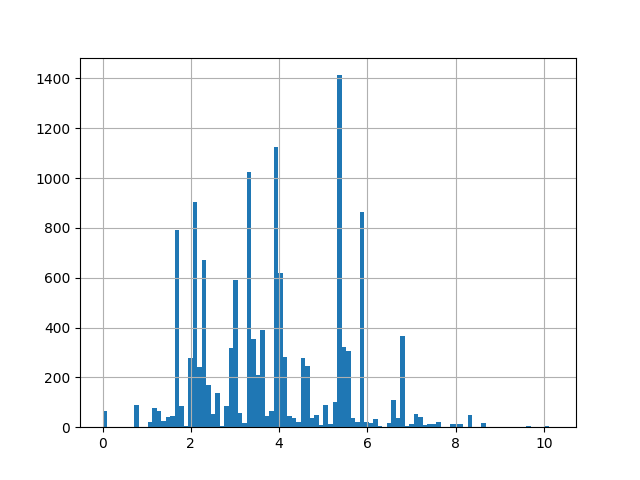

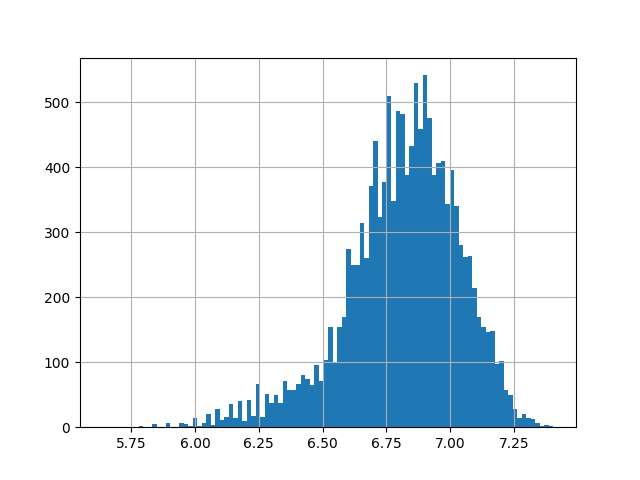

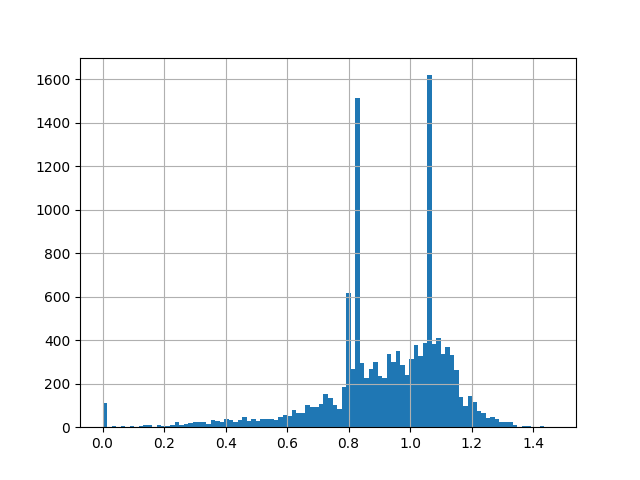

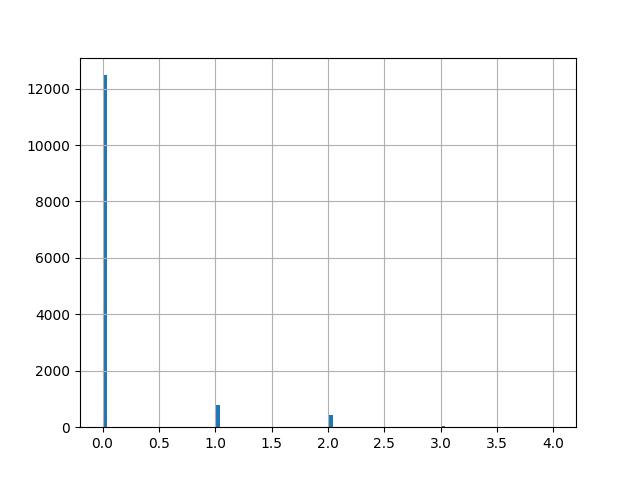

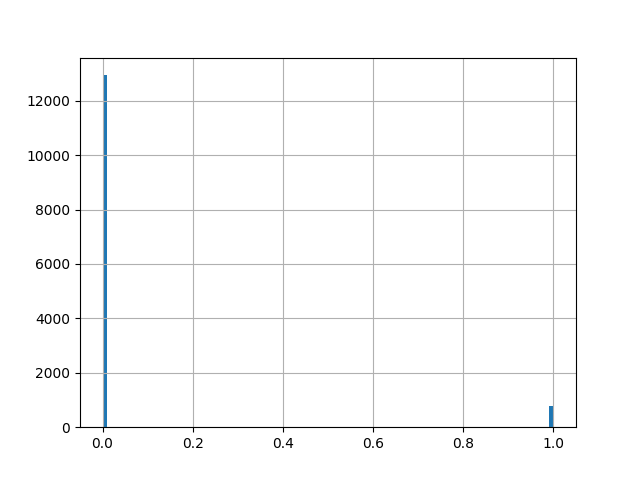

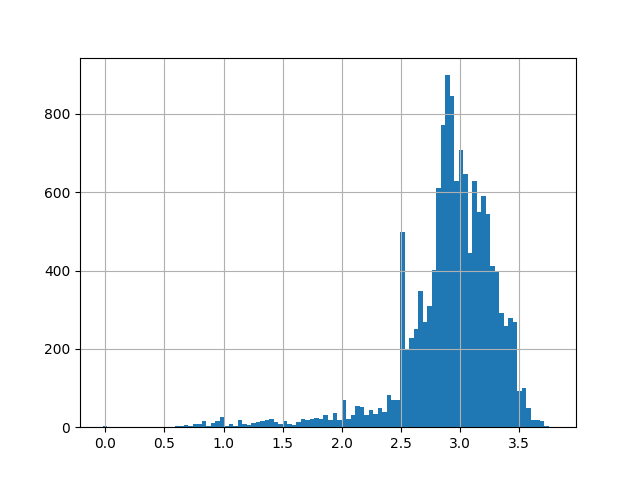

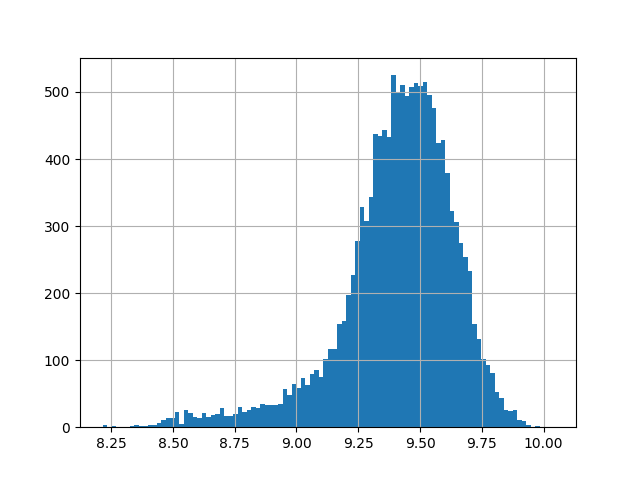

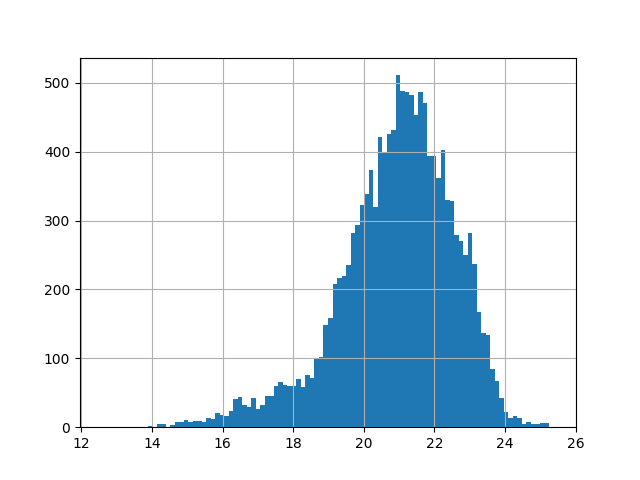

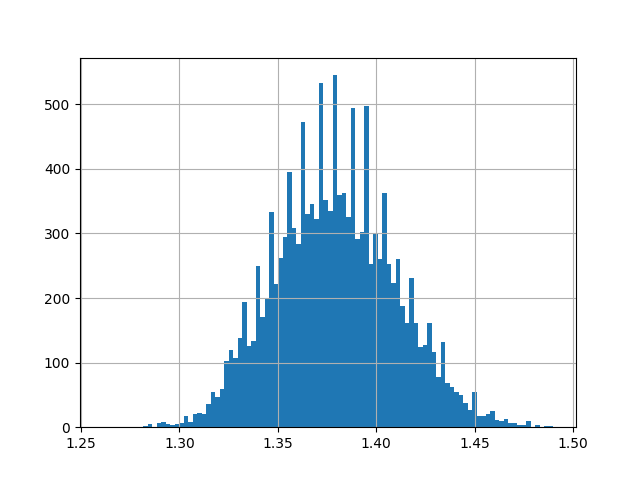

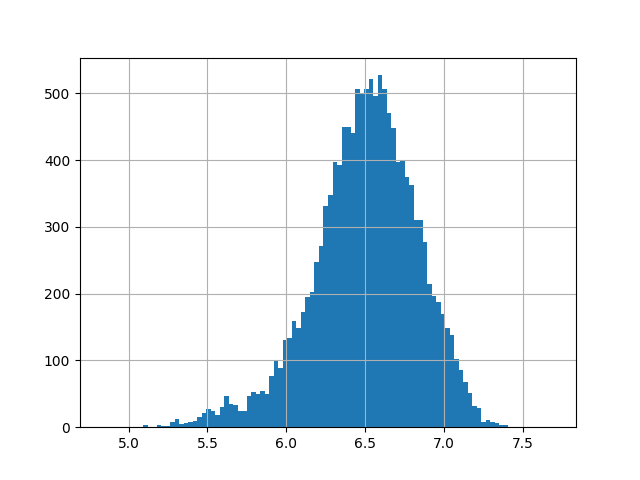

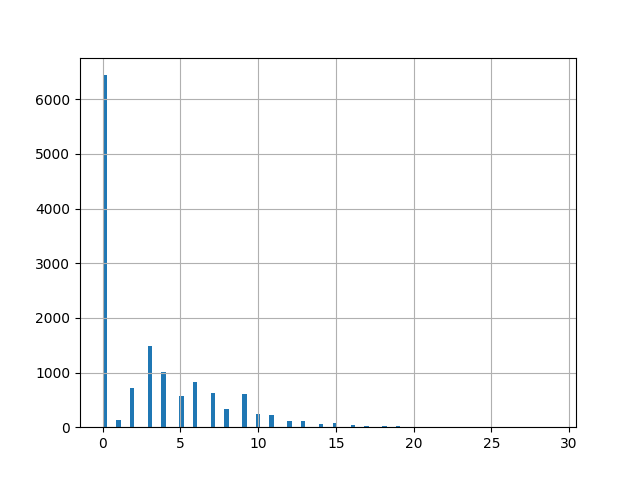

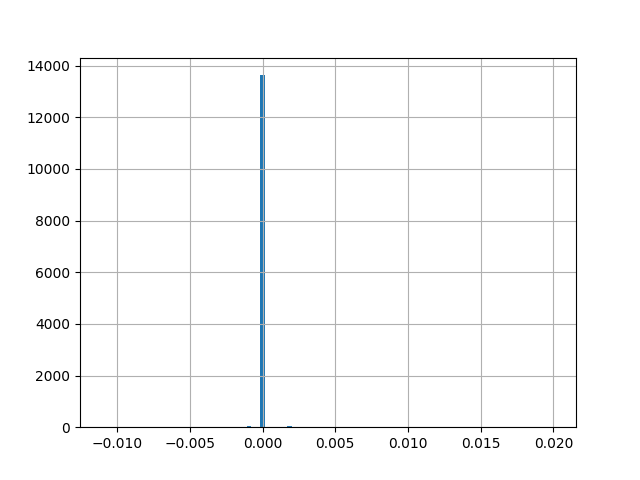

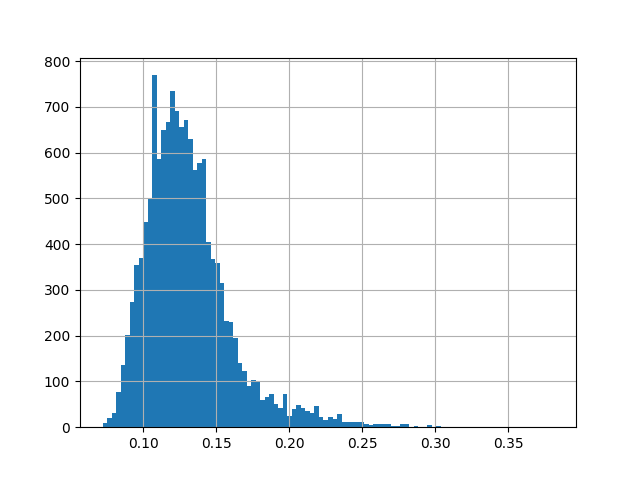

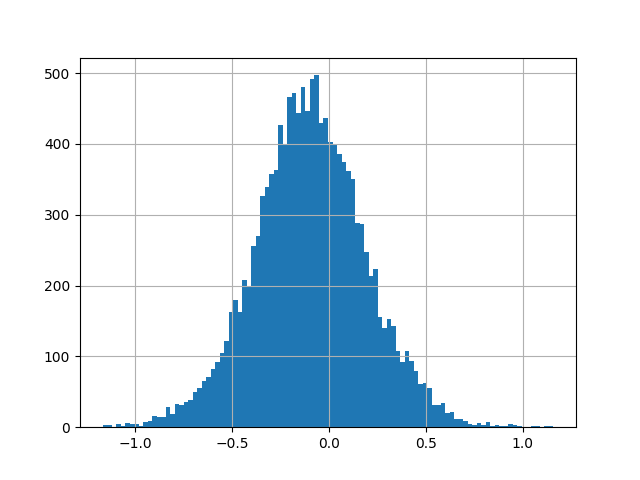

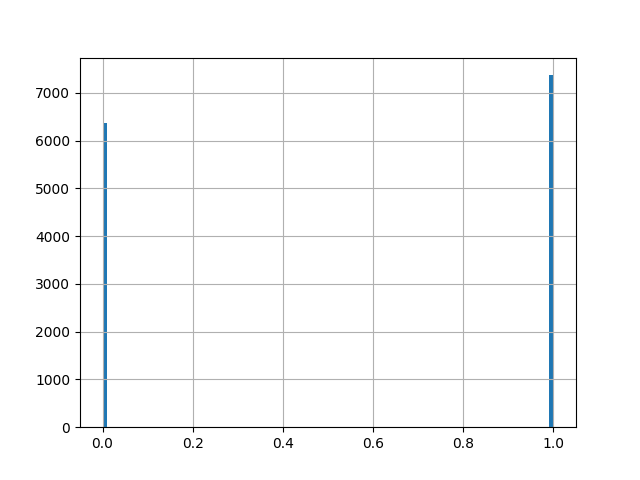

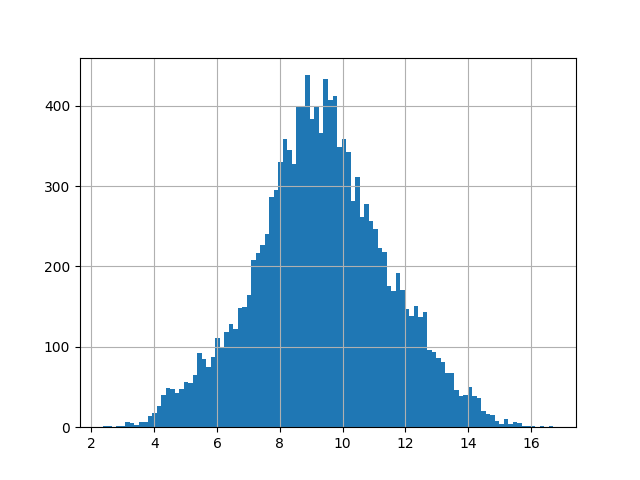

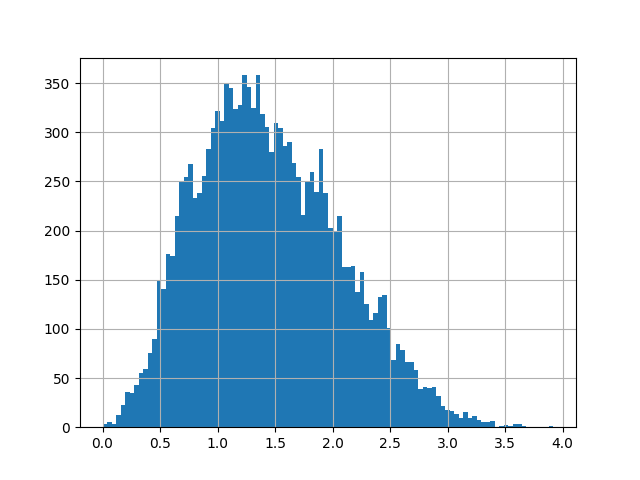

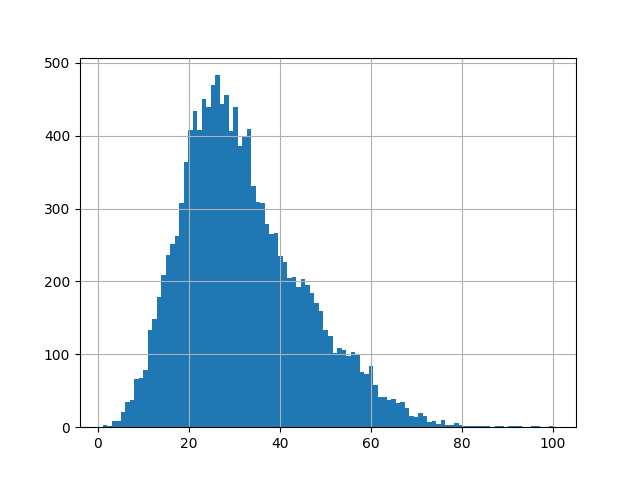

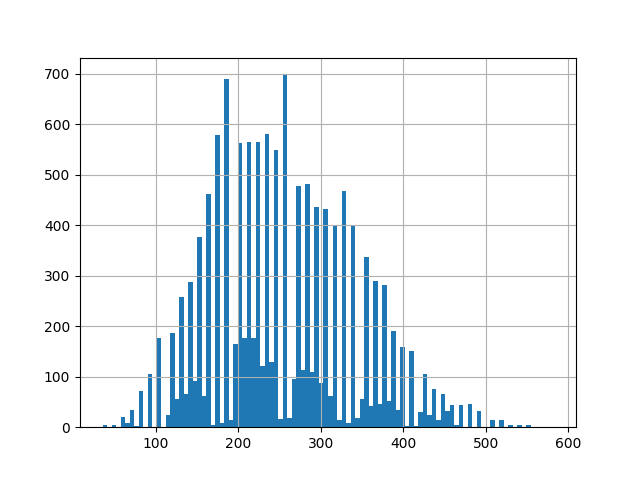

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [27]:
from IPython.display import Image,display_png
from glob import glob

[
    display_png(Image(p))
    for p
    in glob('/store/aug/*.png')[:100]
]